> ## **Flight Price Predication Using ML Techniques**
***
<b><em> By: Mr.Lokesh Baviskar </em></b>

<b><em> Internship Batch:20 </em></b>

> ### **PROBLEM STATEMENT:** 
***

**Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest 
available ticket on a given flight gets more and less expensive over time. This usually happens as 
an attempt to maximize revenue based on**
- **1. Time of purchase patterns (making sure last-minute purchases are expensive)**
- **2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order to reduce sales and hold back inventory for those expensive last-minute expensive purchases)**

**So, you have to work on a project where you collect data of flight fares with other features and 
work to make a model to predict fares of flights.**

- **Importing require library for performing EDA, Data Wrangling and data cleaning**

In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset excel file using pandas.
df= pd.read_excel('Flight_Price_dataset_2.xlsx')

In [3]:
print('No. of Rows :',df.shape[0])
print('No. of Columns :',df.shape[1])
pd.set_option('display.max_columns',None) # This will enable us to see truncated columns
df.head()

No. of Rows : 2955
No. of Columns : 12


,Unnamed: 0,Airline,Class,Aeroplane,Date,Departure_Time,Arrival_Time,Source,Destination,Stops,Duration,Price
0,0,Go First,Ecomony Class,G8-334,"Sun, 23 Jan 2022",08:00:00,10:10:00,New Delhi,Mumbai,Non Stop,2h 10m,5954
1,1,Go First,Ecomony Class,G8-354,"Sun, 23 Jan 2022",22:30:00,00:40\n+ 1 day,New Delhi,Mumbai,Non Stop,2h 10m,5954
2,2,Go First,Ecomony Class,G8-2501,"Sun, 23 Jan 2022",02:00:00,04:15:00,New Delhi,Mumbai,Non Stop,2h 15m,5954
3,3,Go First,Ecomony Class,G8-392,"Sun, 23 Jan 2022",12:45:00,15:00:00,New Delhi,Mumbai,Non Stop,2h 15m,5954
4,4,Go First,Ecomony Class,G8-336,"Sun, 23 Jan 2022",14:20:00,16:35:00,New Delhi,Mumbai,Non Stop,2h 15m,5954


In [4]:
df.drop(columns='Unnamed: 0', inplace =True)

In [5]:
# lets sort columns by their datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Price'], object: ['Airline', 'Class', 'Aeroplane', 'Date', 'Departure_Time', 'Arrival_Time', 'Source', 'Destination', 'Stops', 'Duration']}

#### Comment :
- Training dataset contain 2955 rows and 12 columns.
- Our Target variable is **Price**. We gone predict flight prices using **Various Regression Algorithms.**
- Some feature with date and time related columns are mention with object datatype. **We gone convert them into datetime datatype format along with going to perform some feature engineering over them to create few new columns of our interest.**

#### Data Integrity Check

- **Dataset can contain whitespaces, missing value, duplicates entries, let investigate integrity of data before proceeding for further analysis.**

In [6]:
df.duplicated().sum()

0

In [7]:
df.isin([' ','?','-','null','NA']).sum().any()

False

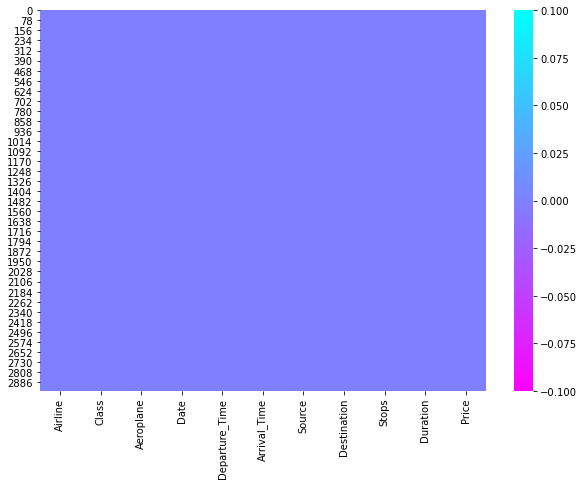

In [8]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(), cmap= 'cool_r')
plt.show()

- **Dataset doesnot contain duplicate data or any missing value.**

### **Data Preprocessing**

- **1.Conversion of Duration column hr & Minutes format to Minutes**

In [9]:
df['Duration'] = df['Duration'].map(lambda x : x.replace('05m','5m'))

In [10]:
# Conversion of Duration column from hr & Minutes format to Minutes
df['Duration'] = df['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

# convert this column into a numeric datatypes
df['Duration']= pd.to_numeric(df['Duration'])

- **2.Create new column for day & date**

In [11]:
df['Day']= df['Date'].map(lambda x :x[:3])

In [12]:
df['Date']= df['Date'].map(lambda x :x[4:])

In [13]:
Categorical = ['Airline','Class','Day','Stops','Aeroplane']

In [14]:
pd.set_option('display.max_rows',None)
for i in Categorical :
    print(i)
    print(df[i].value_counts())
    print('='*100)

Airline
Vistara Premium Economy    619
Air India                  435
Vistara                    421
Air India Business         396
Vistara Business           370
Go First                   319
IndiGo                     270
SpiceJet                   125
Name: Airline, dtype: int64
Class
Ecomony Class      1570
Business Class      766
Premium Ecomony     619
Name: Class, dtype: int64
Day
Wed    505
Fri    474
Tue    463
Thu    447
Sun    442
Mon    419
Sat    205
Name: Day, dtype: int64
Stops
1 Stop       2007
Non Stop      886
2 Stop(s)      62
Name: Stops, dtype: int64
Aeroplane
UK-981          39
UK-985          39
UK-955          39
UK-871/878      39
UK-899/876      39
UK-879/876      39
UK-927          39
UK-941          39
UK-943          39
UK-859/876      39
UK-829/878      39
UK-829/876      39
UK-637/652      38
UK-993          38
UK-706/652      38
UK-933          38
UK-706/654      37
UK-637/654      37
UK-879/878      35
UK-673/622      34
UK-975          33
UK-871/876  

In [15]:
df.describe(include=object).style.background_gradient(cmap='summer_r')

,Airline,Class,Aeroplane,Date,Departure_Time,Arrival_Time,Source,Destination,Stops,Day
count,2955,2955,2955,2955,2955,2955,2955,2955,2955,2955
unique,8,3,260,13,120,150,1,1,3,7
top,Vistara Premium Economy,Ecomony Class,UK-981,2 Feb 2022,07:30:00,23:00:00,New Delhi,Mumbai,1 Stop,Wed
freq,619,1570,39,274,125,156,2955,2955,2007,505


# EDA 

#### **Exploring Airline Types**

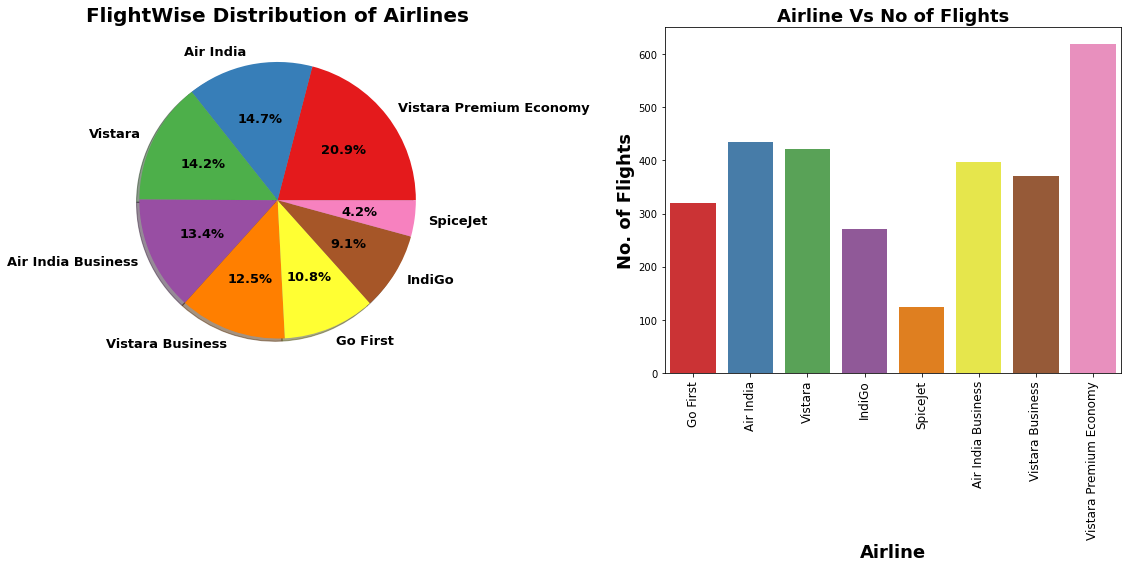

In [16]:
# Pie & count plot of Airline types
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Airline'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontsize':13,'fontweight' :'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('FlightWise Distribution of Airlines', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Airline',data=df,ax=ax[1])
ax[1].set_title('Airline Vs No of Flights',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Airline",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Flights",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=12,rotation= 90)
plt.tight_layout()
plt.show()

#### Observation:
- **We can see maximum number of flights run by Vistara Premium Economy while minimum Flights run by Spicejet.**
- **Around 25% of flights of Business Class.**

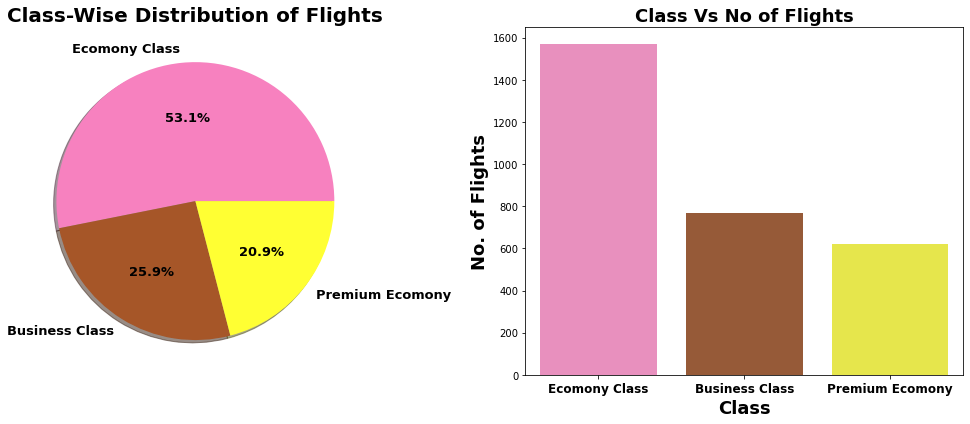

In [17]:
# Counting class type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1_r')
f,ax=plt.subplots(1,2,figsize=(14,6))
df['Class'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontsize':13,'fontweight' :'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('Class-Wise Distribution of Flights', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Class',data=df,ax=ax[1])
ax[1].set_title('Class Vs No of Flights',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Class",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Flights",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **53.1% flights are of Ecomony class, as they are low cost of flight & most of people prefer it.**
- **There are more business class flights than Premuim Ecomony flights. It strange because Business class is costlier than Premuim Ecomony class.**

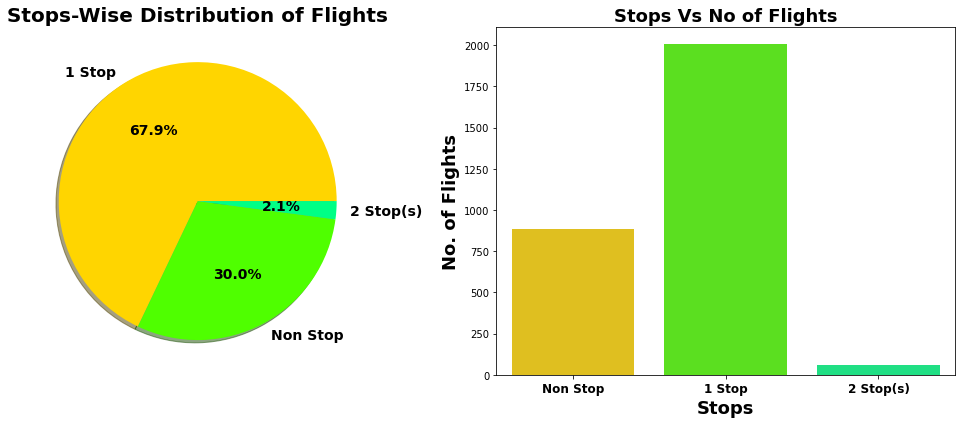

In [18]:
# Counting No of stops
plt.rcParams["figure.autolayout"] = True
sns.set_palette('hsv')
f,ax=plt.subplots(1,2,figsize=(14,6))
df['Stops'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontsize':14,'fontweight' :'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('Stops-Wise Distribution of Flights', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Stops',data=df,ax=ax[1])
ax[1].set_title('Stops Vs No of Flights',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Stops",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Flights",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **67.9% flights take single stop in there way from New Dehli to Mumbai.It is also possible that these flights may have high flight duration compare to Non-stop Flight**
- **30% of flights do not have any stop in there route.**

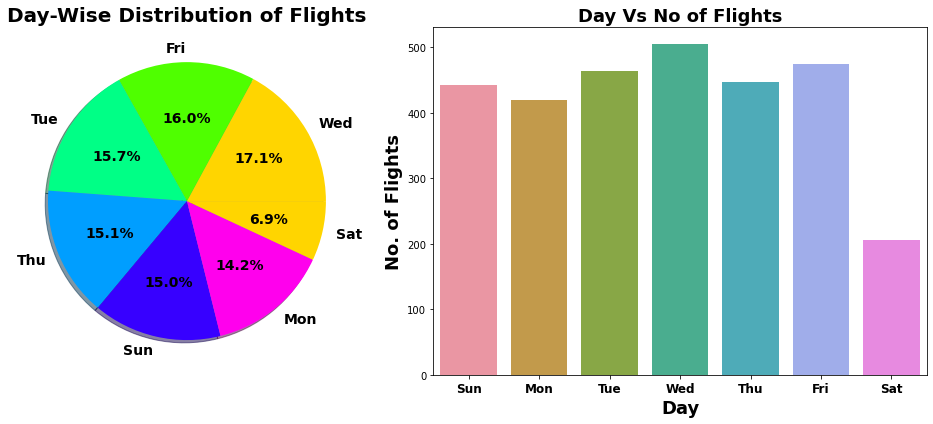

In [19]:
# Counting No of stops
plt.rcParams["figure.autolayout"] = True
sns.set_palette('hsv')
f,ax=plt.subplots(1,2,figsize=(14,6))
df['Day'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontsize':14,'fontweight' :'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('Day-Wise Distribution of Flights', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Day',data=df,ax=ax[1])
ax[1].set_title('Day Vs No of Flights',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Day",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Flights",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

- **On Wednesday Maximum flights run while on saturday minimum flights run**

**It will be interesting to investigate variation of fare as per different week days.**

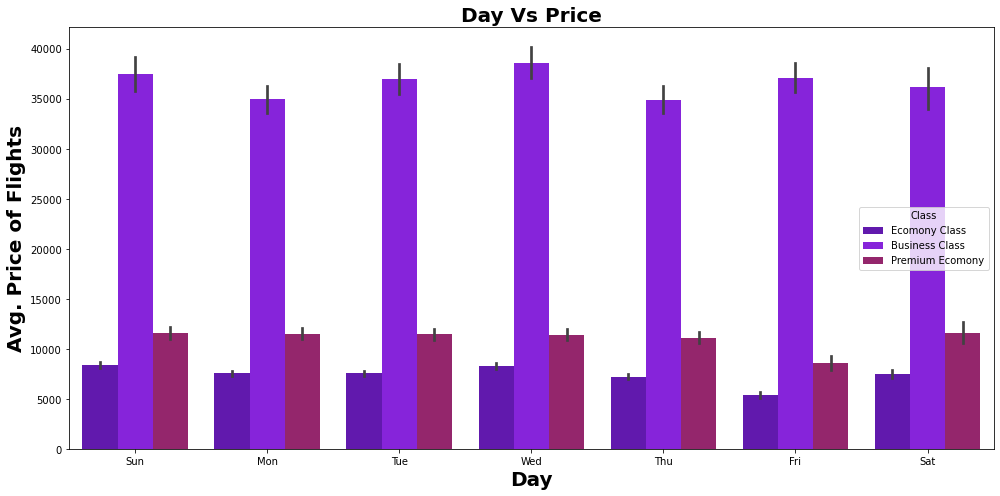

In [20]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gnuplot')
plt.figure(figsize =(14,7))
sns.barplot(x=df['Day'],y=df['Price'],hue=df['Class'])
plt.title("Day Vs Price",fontsize=20,fontweight ='bold')
plt.xlabel('Day',fontsize = 20,fontweight ='bold')
plt.ylabel('Avg. Price of Flights',fontsize = 20,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **Maximum Avg. Fare for Business Flights is on Wedsday while minimum Avg. Fare for Business flights on Thursday.**
- **For Ecomony Flights & Premium Ecomony Flights: Minimum Avg. Fare on Friday.**
- **For Ecomony Flights & Premium Ecomony Flights: Maximum Avg. Fare on Monday.**

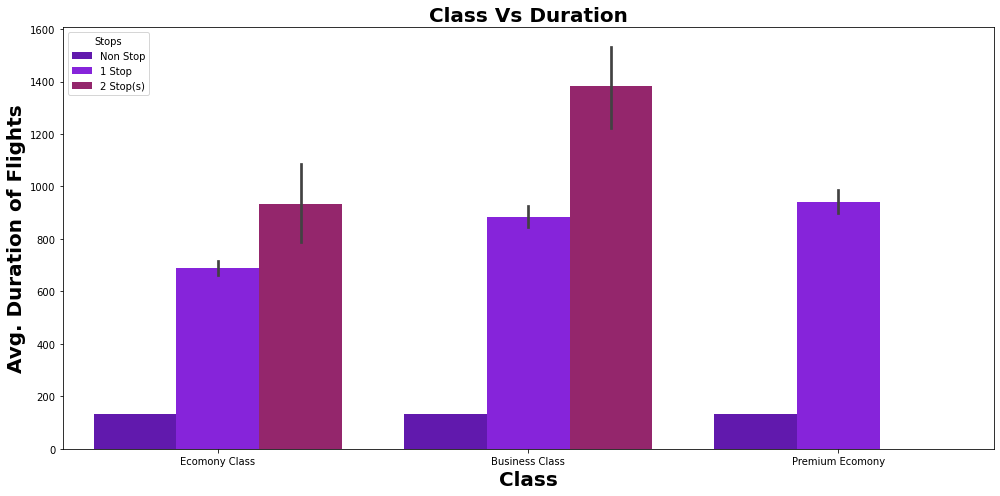

In [21]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gnuplot')
plt.figure(figsize =(14,7))
sns.barplot(x=df['Class'],y=df['Duration'],hue=df['Stops'])
plt.title("Class Vs Duration",fontsize=20,fontweight ='bold')
plt.xlabel('Class',fontsize = 20,fontweight ='bold')
plt.ylabel('Avg. Duration of Flights',fontsize = 20,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **As Number of Stops increase the duration of flights increases.**
- **As per Class of flight Maximum Avg. Duration of flight is for Business class.** 

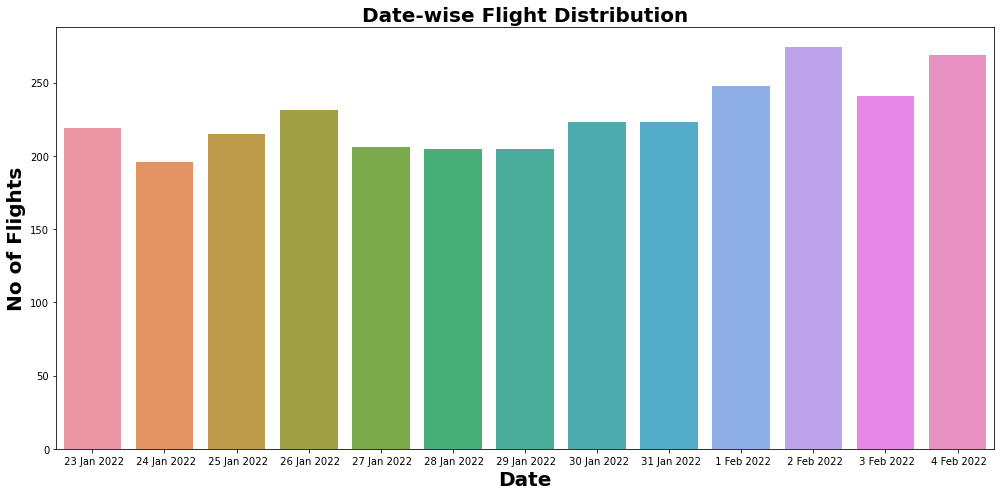

In [22]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('mako')
plt.figure(figsize =(14,7))
sns.countplot(x=df['Date'])
plt.title("Date-wise Flight Distribution",fontsize=20,fontweight ='bold')
plt.xlabel('Date',fontsize = 20,fontweight ='bold')
plt.ylabel('No of Flights',fontsize = 20,fontweight ='bold')
plt.tight_layout()
plt.show()

**We can see those Maximum flights schedule on 2 Feb 2022 & Minimum flights schedule on 24 Jan 2022.**

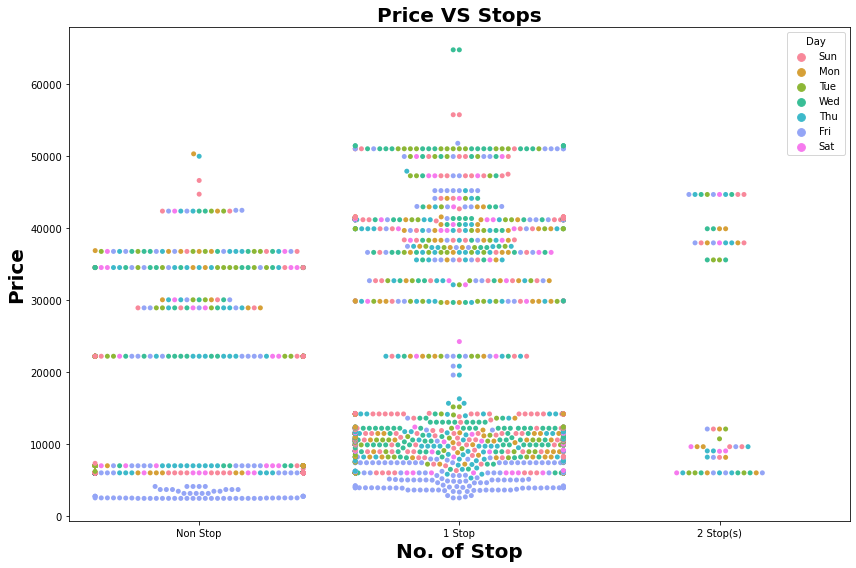

In [78]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('mako')
plt.figure(figsize =(12,8))
sns.swarmplot(y=df['Price'],x=df['Stops'], hue= df['Day'])
plt.title("Price VS Stops",fontsize=20,fontweight ='bold')
plt.xlabel('No. of Stop',fontsize = 20,fontweight ='bold')
plt.ylabel('Price',fontsize = 20,fontweight ='bold')
plt.tight_layout()
plt.show()

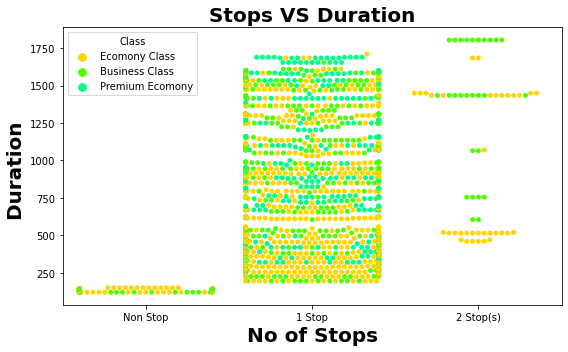

In [70]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('hsv')
plt.figure(figsize =(8,5))
sns.swarmplot(y=df['Duration'],x=df['Stops'], hue =df['Class'])
plt.title("Stops VS Duration",fontsize=20,fontweight ='bold')
plt.xlabel('No of Stops',fontsize = 20,fontweight ='bold')
plt.ylabel('Duration ',fontsize = 20,fontweight ='bold')
plt.tight_layout()
plt.show()

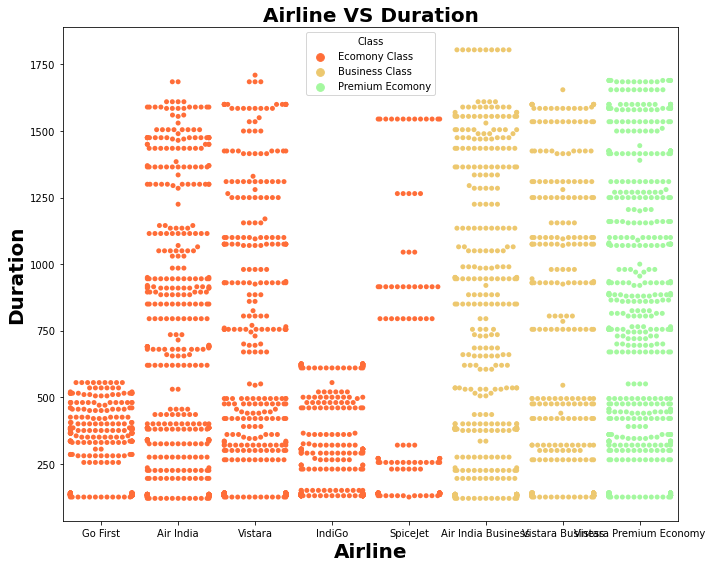

In [72]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow_r')
plt.figure(figsize =(10,8))
sns.swarmplot(x=df['Airline'],y=df['Duration'], hue =df['Class'])
plt.title("Airline VS Duration",fontsize=20,fontweight ='bold')
plt.xlabel('Airline',fontsize = 20,fontweight ='bold')
plt.ylabel('Duration',fontsize = 20,fontweight ='bold')
plt.tight_layout()
plt.show()

## ***Feature Engineering***

### **1. Encoding Categorical Data**

In [23]:
# Dropping Unnecessary columns
df.drop(columns=['Departure_Time','Arrival_Time','Source','Destination'], inplace= True)

In [24]:
# lets sort columns by their datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Duration', 'Price'], object: ['Airline', 'Class', 'Aeroplane', 'Date', 'Stops', 'Day']}

In [25]:
Categorical = ['Airline', 'Class', 'Aeroplane', 'Date', 'Stops', 'Day']
Numerical = ['Duration', 'Price']

In [26]:
df['Aeroplane']= df['Aeroplane'].map(lambda x: str(x).replace('-',''))
df['Aeroplane']= df['Aeroplane'].map(lambda x: str(x).replace('/',''))

In [27]:
# Using Label encoder for transforming Categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Categorical:
    df[i] =le.fit_transform(df[i])
df.head()

,Airline,Class,Aeroplane,Date,Stops,Duration,Price,Day
0,2,1,130,2,2,130,5954,3
1,2,1,134,2,2,130,5954,3
2,2,1,122,2,2,135,5954,3
3,2,1,135,2,2,135,5954,3
4,2,1,131,2,2,135,5954,3


- **We have sucessfully converted Categorical variable in numerical variable using label encoder**

### **2. Outliers Detection & Removal**

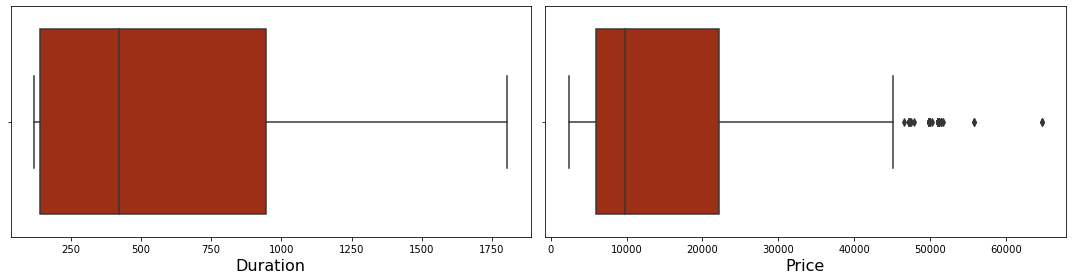

In [28]:
plt.figure(figsize=(15,4), facecolor ='white')
plt_num = 1
for i in Numerical:
    if plt_num <= 2:
        ax = plt.subplot(1,2,plt_num)
        sns.boxplot(df[i], palette='gnuplot')
        plt.xlabel(i, fontsize= 16)
    plt_num += 1
plt.show()

**From Boxplot we can see presense of outliers.**

**Since Data is realstic and data is error-free, we will Proceed for building ML model  without removing outliers. Since Outliers detected are with realstic value.**

### **3. Correlation**

In [29]:
df.corr()

,Airline,Class,Aeroplane,Date,Stops,Duration,Price,Day
Airline,1.000000,0.438941,0.789746,0.017338,0.037179,0.045681,0.009741,-0.006195
Class,0.438941,1.000000,0.257569,0.011258,-0.061700,0.040081,-0.704708,-0.008282
Aeroplane,0.789746,0.257569,1.000000,0.020461,0.196011,-0.028729,0.043954,-0.006735
Date,0.017338,0.011258,0.020461,1.000000,0.006696,0.011823,-0.055609,-0.620776
Stops,0.037179,-0.061700,0.196011,0.006696,1.000000,-0.606977,-0.172458,-0.009300
Duration,0.045681,0.040081,-0.028729,0.011823,-0.606977,1.000000,0.238488,-0.009331
Price,0.009741,-0.704708,0.043954,-0.055609,-0.172458,0.238488,1.000000,0.055829
Day,-0.006195,-0.008282,-0.006735,-0.620776,-0.009300,-0.009331,0.055829,1.000000


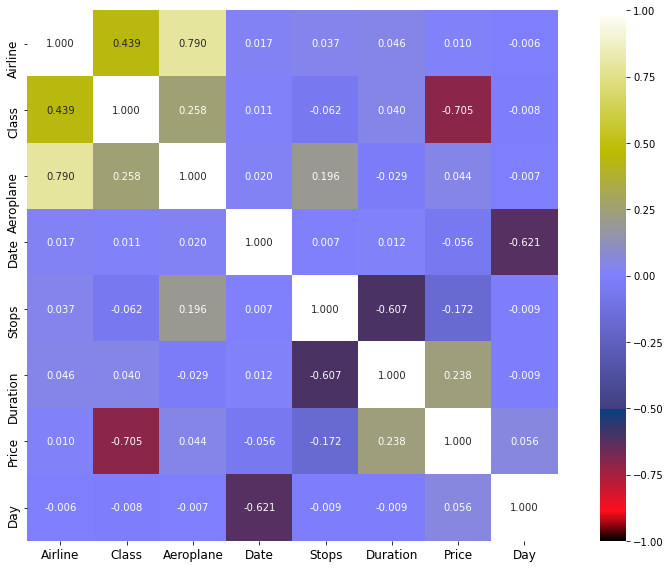

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),linecolor='black', vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap='gist_stern')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

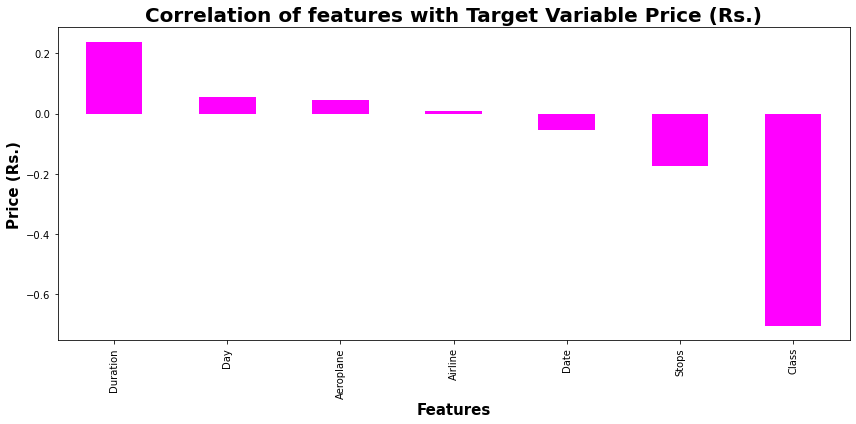

In [31]:
plt.figure(figsize = (12,6))
df.corr()['Price'].drop(['Price']).sort_values(ascending=False).plot(kind='bar',cmap = 'spring')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Price (Rs.)',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Price (Rs.)',fontsize = 20,fontweight='bold')
plt.show()

#### Observation:
- **We can class is highly correlated with target variable Price.**
- **Most of features are moderately & poorly correlated with each other.**

### **4. Skewness detection**

In [32]:
df.skew()

Airline     -0.104472
Class        0.062718
Aeroplane   -0.138638
Date         0.003528
Stops        0.820233
Duration     0.777539
Price        1.273832
Day         -0.152787
dtype: float64

- **We can see Price, Stops & Duration are skewed features.**
- **We cannot transform Price features as it is target variable while stops is categorical variable so concept of skewness doesnot applicable to it.**

## **Standard Scaling**

In [33]:
# Splitting data in target and dependent feature
X = df.drop(['Price'], axis=1)
Y = df['Price']

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

## **Machine Learning Model Building**

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=0.33)
print('Training Feature Matrix Size:', X_train.shape)
print('Training Target Vector Size :', Y_train.shape)
print('Test Feature Matrix Size:', X_test.shape)
print('Test Target Vector Size:', Y_test.shape)

Training Feature Matrix Size: (1979, 7)
Training Target Vector Size : (1979,)
Test Feature Matrix Size: (976, 7)
Test Target Vector Size: (976,)


### **Finding best Random state**

In [37]:
maxR2_score=0
maxRS=0
for i in range(50,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.7332282158142226 on Random_state 70


### **Linear Regression**

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 70, test_size=0.33)
lin_reg= LinearRegression()
lin_reg.fit(X_train, Y_train)
y_pred = lin_reg.predict(X_test)
print('\033[1m'+ 'Error :'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error :
Mean absolute error : 5625.518848733742
Mean squared error : 47501598.0148055
Root Mean squared error : 6892.140307248939
 R2 Score :
73.32282158142226


In [61]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : -16.392609635258424


### **Random Forest Regressor**

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 70, test_size=0.33)
rfc = RandomForestRegressor()
rfc.fit(X_train, Y_train)
y_pred = rfc.predict(X_test)
print('\033[1m'+ 'Error of Random Forest Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of Random Forest Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of Random Forest Regressor:
Mean absolute error : 560.0079610655738
Mean squared error : 1999928.1705449792
Root Mean squared error : 1414.1881665977053
R2 Score of Random Forest Regressor :
98.87682850978321


In [62]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(rfc, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',rfc,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.7976350585970198


### **Decision Tree Regressor**

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 70, test_size=0.33)
dtc = DecisionTreeRegressor()
dtc.fit(X_train, Y_train)
y_pred = dtc.predict(X_test)
print('\033[1m'+ 'Error of Decision Tree Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of Decision Tree Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of Decision Tree Regressor:
Mean absolute error : 420.3575819672131
Mean squared error : 2664435.6096311477
Root Mean squared error : 1632.309899997898
R2 Score of Decision Tree Regressor :
98.50363720140977


In [63]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(dtc, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',dtc,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.653564724844329


### **Extra Trees Regressor**

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 70, test_size=0.33)
etc = ExtraTreesRegressor()
dtc.fit(X_train, Y_train)
y_pred = dtc.predict(X_test)
print('\033[1m'+ 'Error of Extra Tree Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of Extra Tree Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of Extra Tree Regressor:
Mean absolute error : 434.3217213114754
Mean squared error : 2792728.9610655736
Root Mean squared error : 1671.1460023186405
R2 Score of Extra Tree Regressor :
98.43158689638494


In [64]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(etc, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',etc,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : ExtraTreesRegressor() :

Mean CV Score : 0.6631341001281015


### **XGB Regressor**

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state= 70, test_size=0.33)
xgb = XGBRegressor()
xgb.fit(X_train, Y_train)
y_pred = xgb.predict(X_test)
print('\033[1m'+ 'Error of XGB Regressor:'+ '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean squared error :', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\033[1m'+'R2 Score of XGB Regressor :'+'\033[0m')
print(r2_score(Y_test,y_pred)*100)

Error of XGB Regressor:
Mean absolute error : 595.8423259297356
Mean squared error : 1756957.5071066087
Root Mean squared error : 1325.502737494951
R2 Score of XGB Regressor :
99.0132822715494


In [65]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(xgb, X_scale, Y, cv=5)
print('\033[1m'+'Cross Validation Score :',xgb,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None) :

Mean CV Score : 0.7582055095451483


- **We can see that XGB Regressor gives maximum R2 score of 99.013 and maximum cross validation score. Among all model we will select XGB Regressor as final model and we will perform hyper parameter tuning over this model to enhance its R2 Score.**

# Hyper Parameter Tuning : GridSearchCV

In [38]:
from sklearn.model_selection import GridSearchCV

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=70, test_size=0.33)

In [55]:
parameter = {'n_estimators':[400,500],'gamma':np.arange(0,0.2,0.1),
              'booster' : ['gbtree','dart','gblinear'], 'max_depth':[6,8],
              'eta' : [0.01, 0.1] }

In [56]:
GCV = GridSearchCV(XGBRegressor(),parameter,verbose =10)

In [57]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400
[CV 1/5; 1/48] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400;, score=0.985 total time=   1.3s
[CV 2/5; 1/48] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400
[CV 2/5; 1/48] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400;, score=0.983 total time=   1.3s
[CV 3/5; 1/48] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400
[CV 3/5; 1/48] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400;, score=0.986 total time=   1.3s
[CV 4/5; 1/48] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400
[CV 4/5; 1/48] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400;, score=0.974 total time=   1.3s
[CV 5/5; 1/48] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400
[CV 5/5; 1/48] END boo

[CV 5/5; 8/48] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=8, n_estimators=500;, score=0.992 total time=   2.2s
[CV 1/5; 9/48] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400
[CV 1/5; 9/48] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400;, score=0.993 total time=   1.3s
[CV 2/5; 9/48] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400
[CV 2/5; 9/48] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400;, score=0.986 total time=   1.3s
[CV 3/5; 9/48] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400
[CV 3/5; 9/48] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400;, score=0.989 total time=   1.3s
[CV 4/5; 9/48] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400
[CV 4/5; 9/48] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400;, score=0.982 total time=   1.5s
[CV 5/5; 9/48] START booster=gbtree, eta=0.1, gamma=0.0, max_

[CV 5/5; 16/48] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=8, n_estimators=500;, score=0.993 total time=   2.4s
[CV 1/5; 17/48] START booster=dart, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400
[CV 1/5; 17/48] END booster=dart, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400;, score=0.985 total time=  11.9s
[CV 2/5; 17/48] START booster=dart, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400
[CV 2/5; 17/48] END booster=dart, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400;, score=0.983 total time=  11.6s
[CV 3/5; 17/48] START booster=dart, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400
[CV 3/5; 17/48] END booster=dart, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400;, score=0.986 total time=  11.7s
[CV 4/5; 17/48] START booster=dart, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400
[CV 4/5; 17/48] END booster=dart, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400;, score=0.974 total time=  12.3s
[CV 5/5; 17/48] START booster=dart, eta=0.01, gamma=0.0, max_

[CV 5/5; 24/48] END booster=dart, eta=0.01, gamma=0.1, max_depth=8, n_estimators=500;, score=0.992 total time=  21.1s
[CV 1/5; 25/48] START booster=dart, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400
[CV 1/5; 25/48] END booster=dart, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400;, score=0.993 total time=  11.8s
[CV 2/5; 25/48] START booster=dart, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400
[CV 2/5; 25/48] END booster=dart, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400;, score=0.986 total time=  11.3s
[CV 3/5; 25/48] START booster=dart, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400
[CV 3/5; 25/48] END booster=dart, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400;, score=0.989 total time=  11.9s
[CV 4/5; 25/48] START booster=dart, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400
[CV 4/5; 25/48] END booster=dart, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400;, score=0.982 total time=  11.8s
[CV 5/5; 25/48] START booster=dart, eta=0.1, gamma=0.0, max_depth=6, n

[CV 1/5; 33/48] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400;, score=0.690 total time=   0.5s
[CV 2/5; 33/48] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400
[14:34:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 2/5; 33/48] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400;, score=0.648 total time=   0.6s
[CV 3/5; 33/48] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400
[14:34:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might no

[CV 4/5; 35/48] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=8, n_estimators=400;, score=0.677 total time=   0.5s
[CV 5/5; 35/48] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=8, n_estimators=400
[14:34:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 5/5; 35/48] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=8, n_estimators=400;, score=0.686 total time=   0.5s
[CV 1/5; 36/48] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=8, n_estimators=500
[14:34:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might no

[CV 2/5; 38/48] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=6, n_estimators=500;, score=0.652 total time=   0.6s
[CV 3/5; 38/48] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=6, n_estimators=500
[14:34:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 3/5; 38/48] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=6, n_estimators=500;, score=0.659 total time=   0.7s
[CV 4/5; 38/48] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=6, n_estimators=500
[14:34:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might no

[CV 5/5; 40/48] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=8, n_estimators=500;, score=0.694 total time=   0.7s
[CV 1/5; 41/48] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400
[14:34:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 1/5; 41/48] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400;, score=0.696 total time=   0.5s
[CV 2/5; 41/48] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400
[14:34:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not b

[CV 3/5; 43/48] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=8, n_estimators=400;, score=0.664 total time=   0.6s
[CV 4/5; 43/48] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=8, n_estimators=400
[14:35:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 4/5; 43/48] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=8, n_estimators=400;, score=0.694 total time=   0.5s
[CV 5/5; 43/48] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=8, n_estimators=400
[14:35:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be

[CV 1/5; 46/48] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=6, n_estimators=500;, score=0.696 total time=   0.7s
[CV 2/5; 46/48] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=6, n_estimators=500
[14:35:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 2/5; 46/48] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=6, n_estimators=500;, score=0.664 total time=   0.7s
[CV 3/5; 46/48] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=6, n_estimators=500
[14:35:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be

[CV 4/5; 48/48] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=8, n_estimators=500;, score=0.694 total time=   0.8s
[CV 5/5; 48/48] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=8, n_estimators=500
[14:35:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "gamma", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 5/5; 48/48] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=8, n_estimators=500;, score=0.705 total time=   0.8s


GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                          

In [58]:
GCV.best_params_

{'booster': 'dart',
 'eta': 0.1,
 'gamma': 0.1,
 'max_depth': 6,
 'n_estimators': 400}

## **Final Model**

In [50]:
Final_mod=XGBRegressor(booster='gbtree', max_depth=6, eta=0.1,
                                gamma=0.1, n_estimators=400)
Final_mod.fit(X_train,Y_train)
pred=Final_mod.predict(X_test)
print('R2_Score:',r2_score(Y_test,pred)*100)
print('mean_squared_error:',mean_squared_error(Y_test,pred))
print('mean_absolute_error:',mean_absolute_error(Y_test,pred))
print("RMSE value:",np.sqrt(mean_squared_error(Y_test, pred)))

R2_Score: 99.04634307031282
mean_squared_error: 1632116.6991678094
mean_absolute_error: 529.1372170370133
RMSE value: 1277.5432279057368


## **Saving Model**

In [51]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_mod,"Flight_Price_Prediction.pkl")

['Flight_Price_Prediction.pkl']

## **Predictions Using Final Model**

In [52]:
# Loading the saved model
model = joblib.load("Flight_Price_Prediction.pkl")

# Prediction
prediction = model.predict(X_test)
prediction

array([22167.604 , 10064.495 ,  6002.7183, 10307.57  ,  2537.9412,
       11483.565 ,  9860.024 , 50032.13  , 41138.03  , 14030.82  ,
       40906.016 ,  5922.8887, 41988.14  , 14169.697 ,  5930.5728,
       49770.832 , 11014.256 , 23257.994 , 11357.58  ,  9746.721 ,
       10472.962 , 41943.06  , 14109.917 ,  6002.034 , 33925.562 ,
        6388.4565,  6009.2036, 39913.79  , 41639.17  , 40642.33  ,
        5832.924 , 51502.18  ,  5861.9575, 42064.75  ,  5909.089 ,
       12322.561 ,  5823.945 ,  5691.414 , 11002.29  ,  8375.135 ,
       13693.422 ,  5764.335 ,  6925.221 , 38990.984 ,  8197.333 ,
        4260.457 ,  6145.8057, 41168.773 , 28995.102 ,  6109.06  ,
       14120.779 ,  6016.7373, 14115.    ,  5956.278 , 12695.885 ,
       40187.652 , 36878.75  , 14070.06  ,  9066.995 ,  6004.369 ,
       42624.664 , 33109.754 , 13549.502 , 30642.143 , 14641.688 ,
       42132.773 ,  7120.7817, 14184.751 ,  7338.897 ,  5012.5605,
        5987.45  ,  8564.636 , 41843.87  ,  9971.6   , 10241.5

In [60]:
pd.DataFrame([model.predict(X_test)[:], Y_test[:]], index = ['Predicted', 'Actual'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975
Predicted,5907.015625,42655.960938,6953.910156,11962.53418,6490.339844,5924.5625,9549.822266,8957.763672,6193.252441,41277.722656,30642.142578,10710.328125,11984.418945,5922.060059,33925.5625,6919.90625,11